In [1]:
using LinearAlgebra
using HePPCAT
using Plots
using ProgressMeter

using Random, Statistics, StatsPlots
using Measures

include("../alpcahFamily.jl")

estimateRank (generic function with 1 method)

In [2]:
using PyCall
@pyimport pickle

function mypickle(filename, obj)
    out = open(filename,"w")
    pickle.dump(obj, out)
    close(out)
 end

function myunpickle(filename)
    r = nothing
    @pywith pybuiltin("open")(filename,"rb") as f begin
        r = pickle.load(f)
    end
    return r
end

myunpickle (generic function with 1 method)

In [3]:
data = myunpickle("airData.pickle")[2]

data[1] .= max.(data[1],0)
data[2] .= max.(data[2],0)
# data[2] .= min.(data[2],250) ### cap maximum reading
data[1] .-= mean(data[1],dims=2)
data[2] .-= mean(data[2],dims=2);
replace!(data[2], NaN=>0)

n1 = size(data[1])[2]
n2 = size(data[2])[2]

k = 30 ### the rank of the experiment

30

In [6]:
print("Dimensions of data group 1: AirNow: " * string(size(data[1]))*"\n")
print("Dimensions of data group 2: PurpleAir: " * string(size(data[2])))

Dimensions of data group 1: AirNow: (108, 46)
Dimensions of data group 2: PurpleAir: (108, 457)

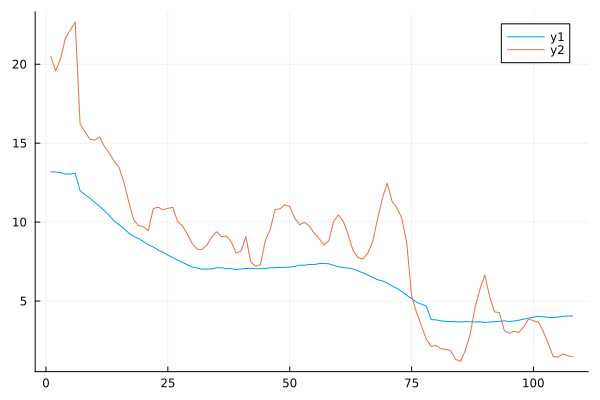

In [10]:
data = myunpickle("airData.pickle")[2]
plot(mean(data[1], dims=2), label="airnow")
plot!(mean(data[2], dims=2))

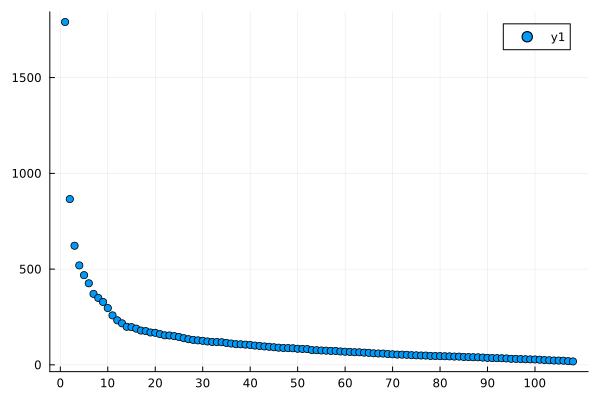

In [4]:
svals = svd(hcat(data[1],data[2])).S
scatter(svals)
xticks!(0:10:108)

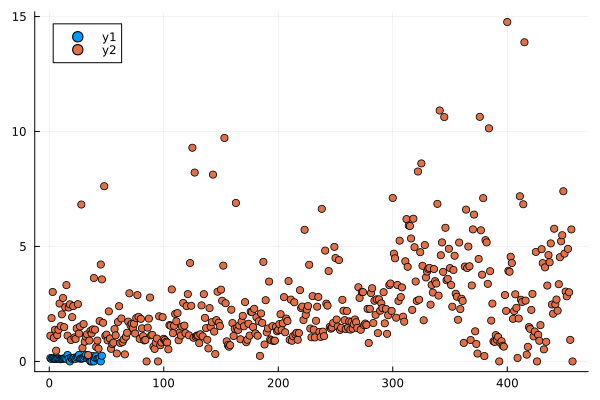

In [7]:
U_data = LR_ALPCAH(hcat(data[1],data[2]),k; alpcahIter=1000)
V_data = grouplessVarianceUpdate(hcat(data[1],data[2]), U_data*U_data'*hcat(data[1],data[2]))
scatter(V_data[1:46].^0.5)
scatter!(V_data[47:end].^0.5)

In [5]:
# ntrain1 = 25 ### number of training samples for AirNow
# ntrain2 = 250

# data[1] .= data[1][:,shuffle(1:end)]
# data[2] .= data[2][:,shuffle(1:end)]
# train1 = data[1][:,1:ntrain1]
# test1 = data[1][:,ntrain1+1:end]
# train2 = data[2][:,1:ntrain2]
# test2 = data[2][:,ntrain2+1:end]
# Ytrain = [train1,train2]
# Ytest = [test1,test2]
# Ymat_train = hcat(Ytrain...);
# Ymat_test = hcat(Ytest...);

# U_ALPCAH = ALPCAH(hcat(data[1][:,1:6],data[2][:,1:250]), 30, 10; μ=10, ρ=1.01, alpcahIter=100)
# norm(Ymat_test - U_ALPCAH*(U_ALPCAH'*Ymat_test)) / norm(Ymat_test)